In [142]:
from google.colab import files
import pandas as pd

# Load the dataset into a DataFrame
df = pd.read_csv('data7.csv')

# Display the first few rows to understand the structure
df.head()


,User ID,Friends Count,Groups Joined,Posts Per Week,Likes Received,Messages Sent,Login Frequency,Time Between Interactions (hours)
0,1,250,5,10,200,30,5,2.0
1,2,400,10,20,1500,50,7,1.0
2,3,10,1,40,50,600,6,0.5
3,4,500,15,5,1000,20,3,4.0
4,5,3,0,45,30,800,7,1.0


In [143]:
# Summary statistics
df.describe()

,User ID,Friends Count,Groups Joined,Posts Per Week,Likes Received,Messages Sent,Login Frequency,Time Between Interactions (hours)
count,50.00000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,178.240000,5.300000,24.48000,522.800000,356.600000,5.420000,1.890000
std,14.57738,171.550262,4.803273,16.66628,483.323443,435.921169,1.566095,1.217601
min,1.00000,0.000000,0.000000,5.00000,5.000000,9.000000,2.000000,0.400000
25%,13.25000,15.000000,1.000000,11.25000,41.250000,23.500000,4.000000,0.925000
50%,25.50000,112.500000,4.000000,17.50000,520.000000,37.500000,5.500000,1.650000
75%,37.75000,332.500000,9.000000,39.50000,800.000000,865.000000,6.750000,2.575000
max,50.00000,510.000000,16.000000,60.00000,1500.000000,1100.000000,8.000000,5.000000


In [144]:
from sklearn.preprocessing import StandardScaler

# Remove unnecessary columns
df_clean = df.drop(columns=['User ID'], errors='ignore')


# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)


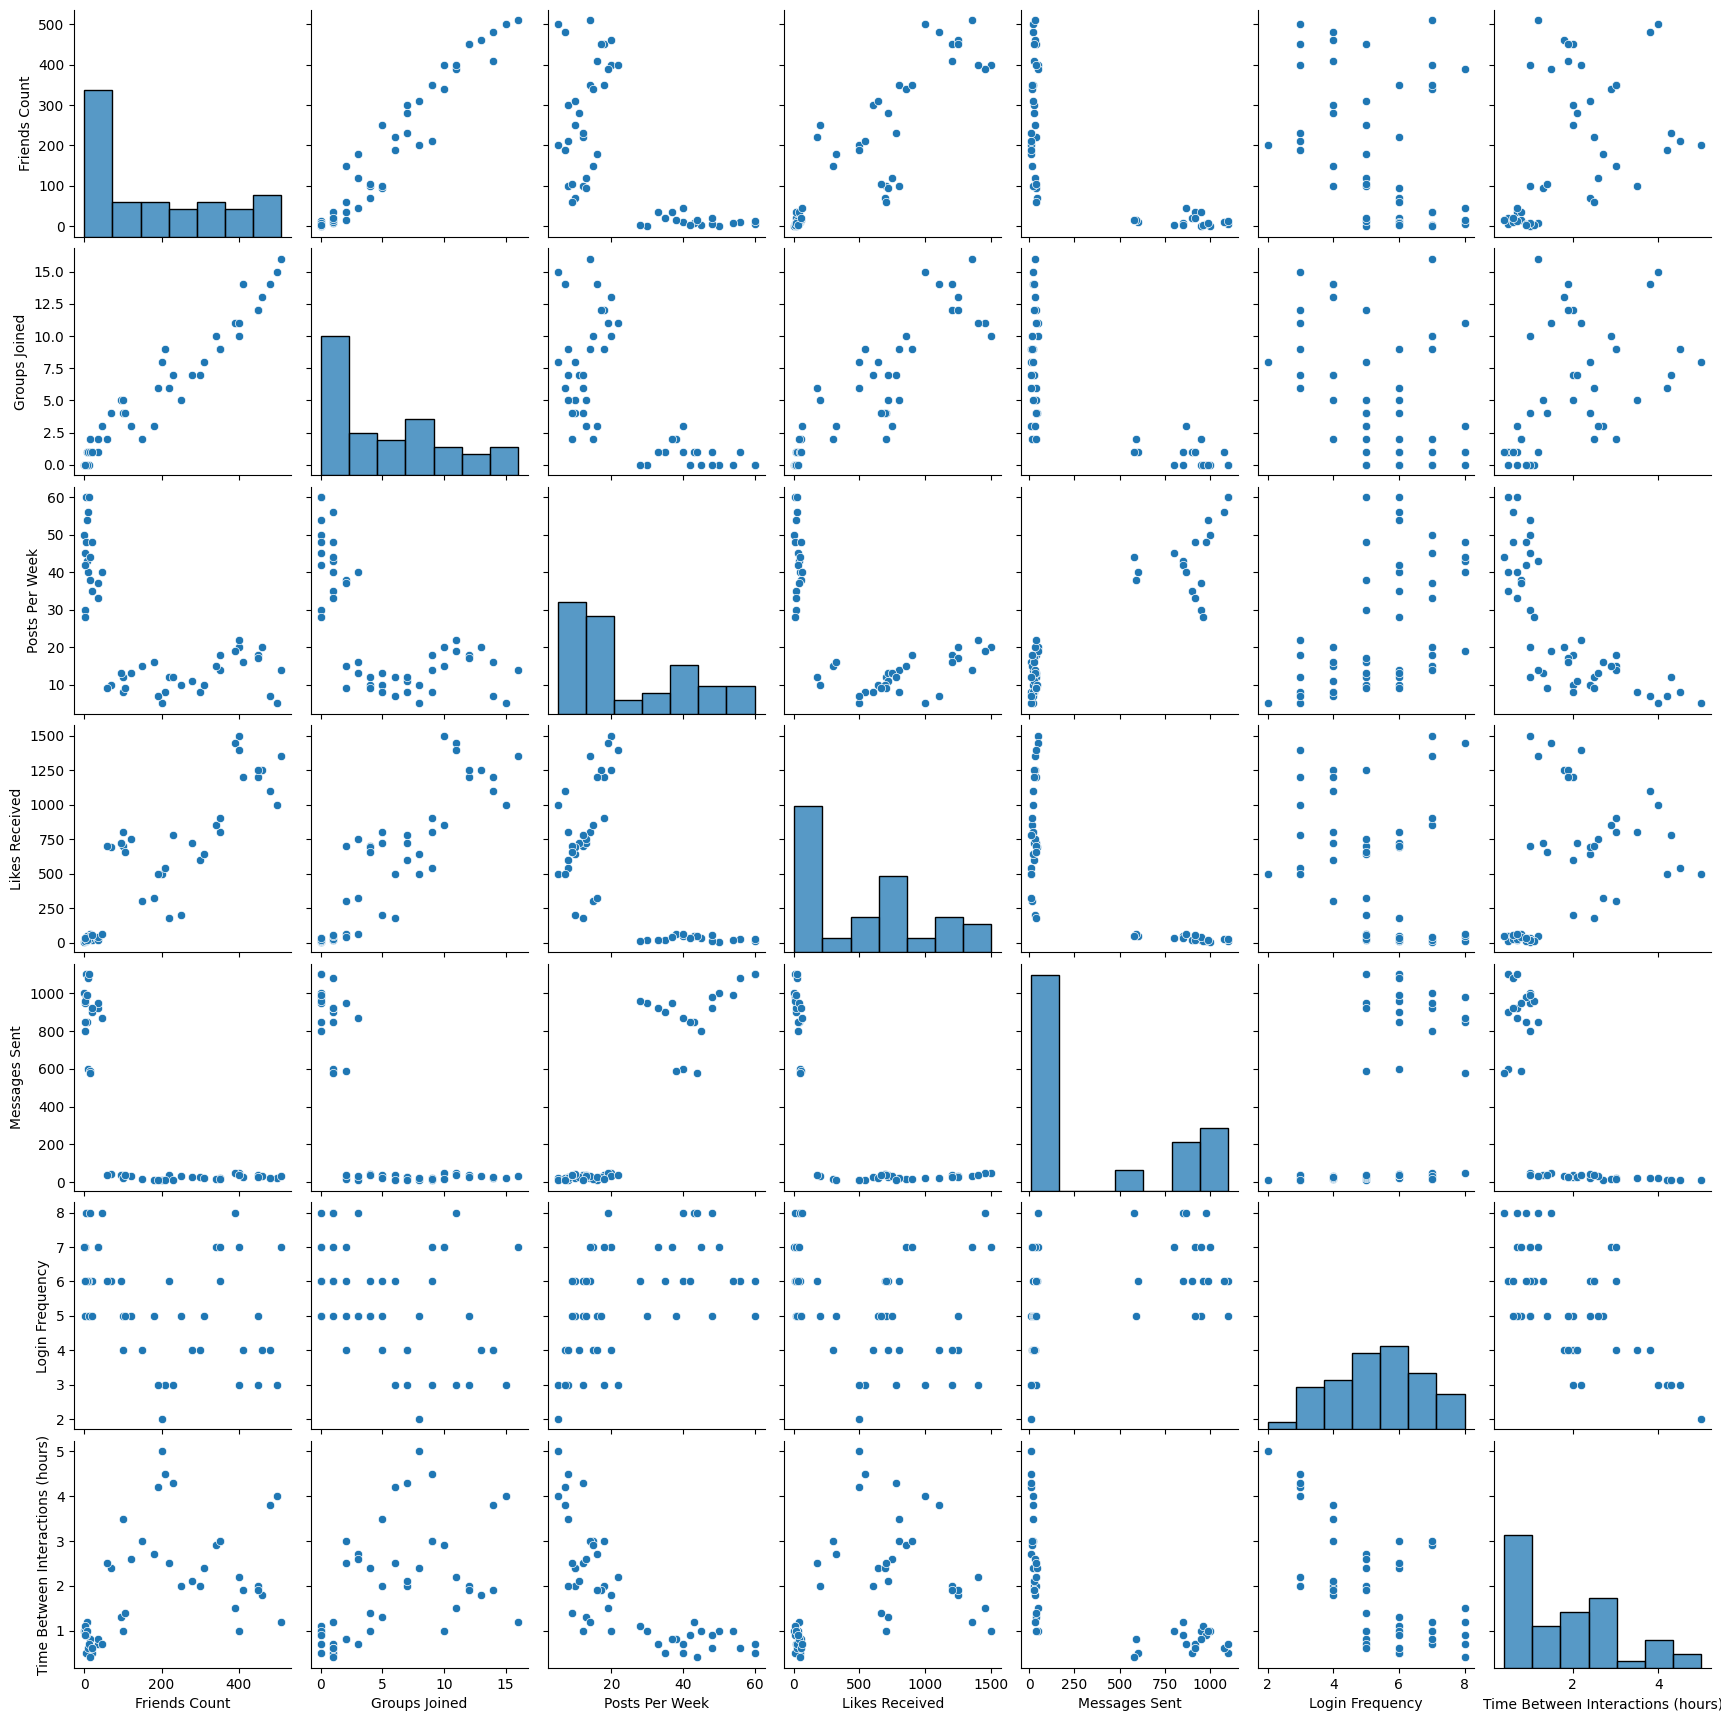

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing distributions of features
sns.pairplot(df_clean)
plt.show()


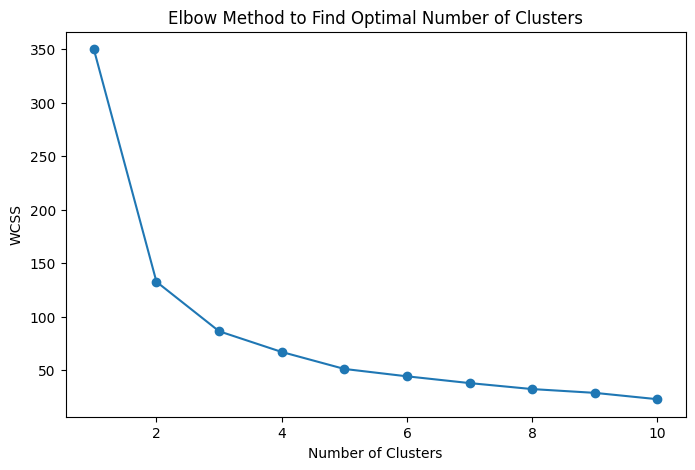

In [146]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method to Find Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [147]:
# Apply K-Means with 2 clusters
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Check the clustering result
df.head()


,User ID,Friends Count,Groups Joined,Posts Per Week,Likes Received,Messages Sent,Login Frequency,Time Between Interactions (hours),Cluster
0,1,250,5,10,200,30,5,2.0,0
1,2,400,10,20,1500,50,7,1.0,0
2,3,10,1,40,50,600,6,0.5,1
3,4,500,15,5,1000,20,3,4.0,0
4,5,3,0,45,30,800,7,1.0,1


In [148]:
# Getting cluster centers in original scale
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=df_clean.columns)

# Display cluster centers
print("Cluster Centers:\n", cluster_centers)


Cluster Centers:
    Friends Count  Groups Joined  Posts Per Week  Likes Received  \
0     279.354839       8.096774       12.677419      824.193548   
1      13.263158       0.736842       43.736842       31.052632   

   Messages Sent  Login Frequency  Time Between Interactions (hours)  
0      27.096774         4.806452                           2.567742  
1     894.210526         6.421053                           0.784211  


In [149]:
# Define suspicious patterns, for example:
suspicious_cluster = cluster_centers[(cluster_centers['Friends Count'] < 100) & (cluster_centers['Messages Sent'] > 500)]
print("Suspicious Cluster Centers:\n", suspicious_cluster)

# Get the index of suspicious clusters
suspicious_cluster_index = suspicious_cluster.index

# Filter users in the suspicious clusters
potential_fraud_users = df[df['Cluster'].isin(suspicious_cluster_index)]
print("Potential Fraudulent Users:\n", potential_fraud_users)


Suspicious Cluster Centers:
    Friends Count  Groups Joined  Posts Per Week  Likes Received  \
1      13.263158       0.736842       43.736842       31.052632   

   Messages Sent  Login Frequency  Time Between Interactions (hours)  
1     894.210526         6.421053                           0.784211  
Potential Fraudulent Users:
     User ID  Friends Count  Groups Joined  Posts Per Week  Likes Received  \
2         3             10              1              40              50   
4         5              3              0              45              30   
6         7             20              1              35              20   
9        10              0              0              50               5   
11       12              5              0              60              10   
13       14              1              0              30              15   
17       18             15              2              38              60   
19       20              8              1        

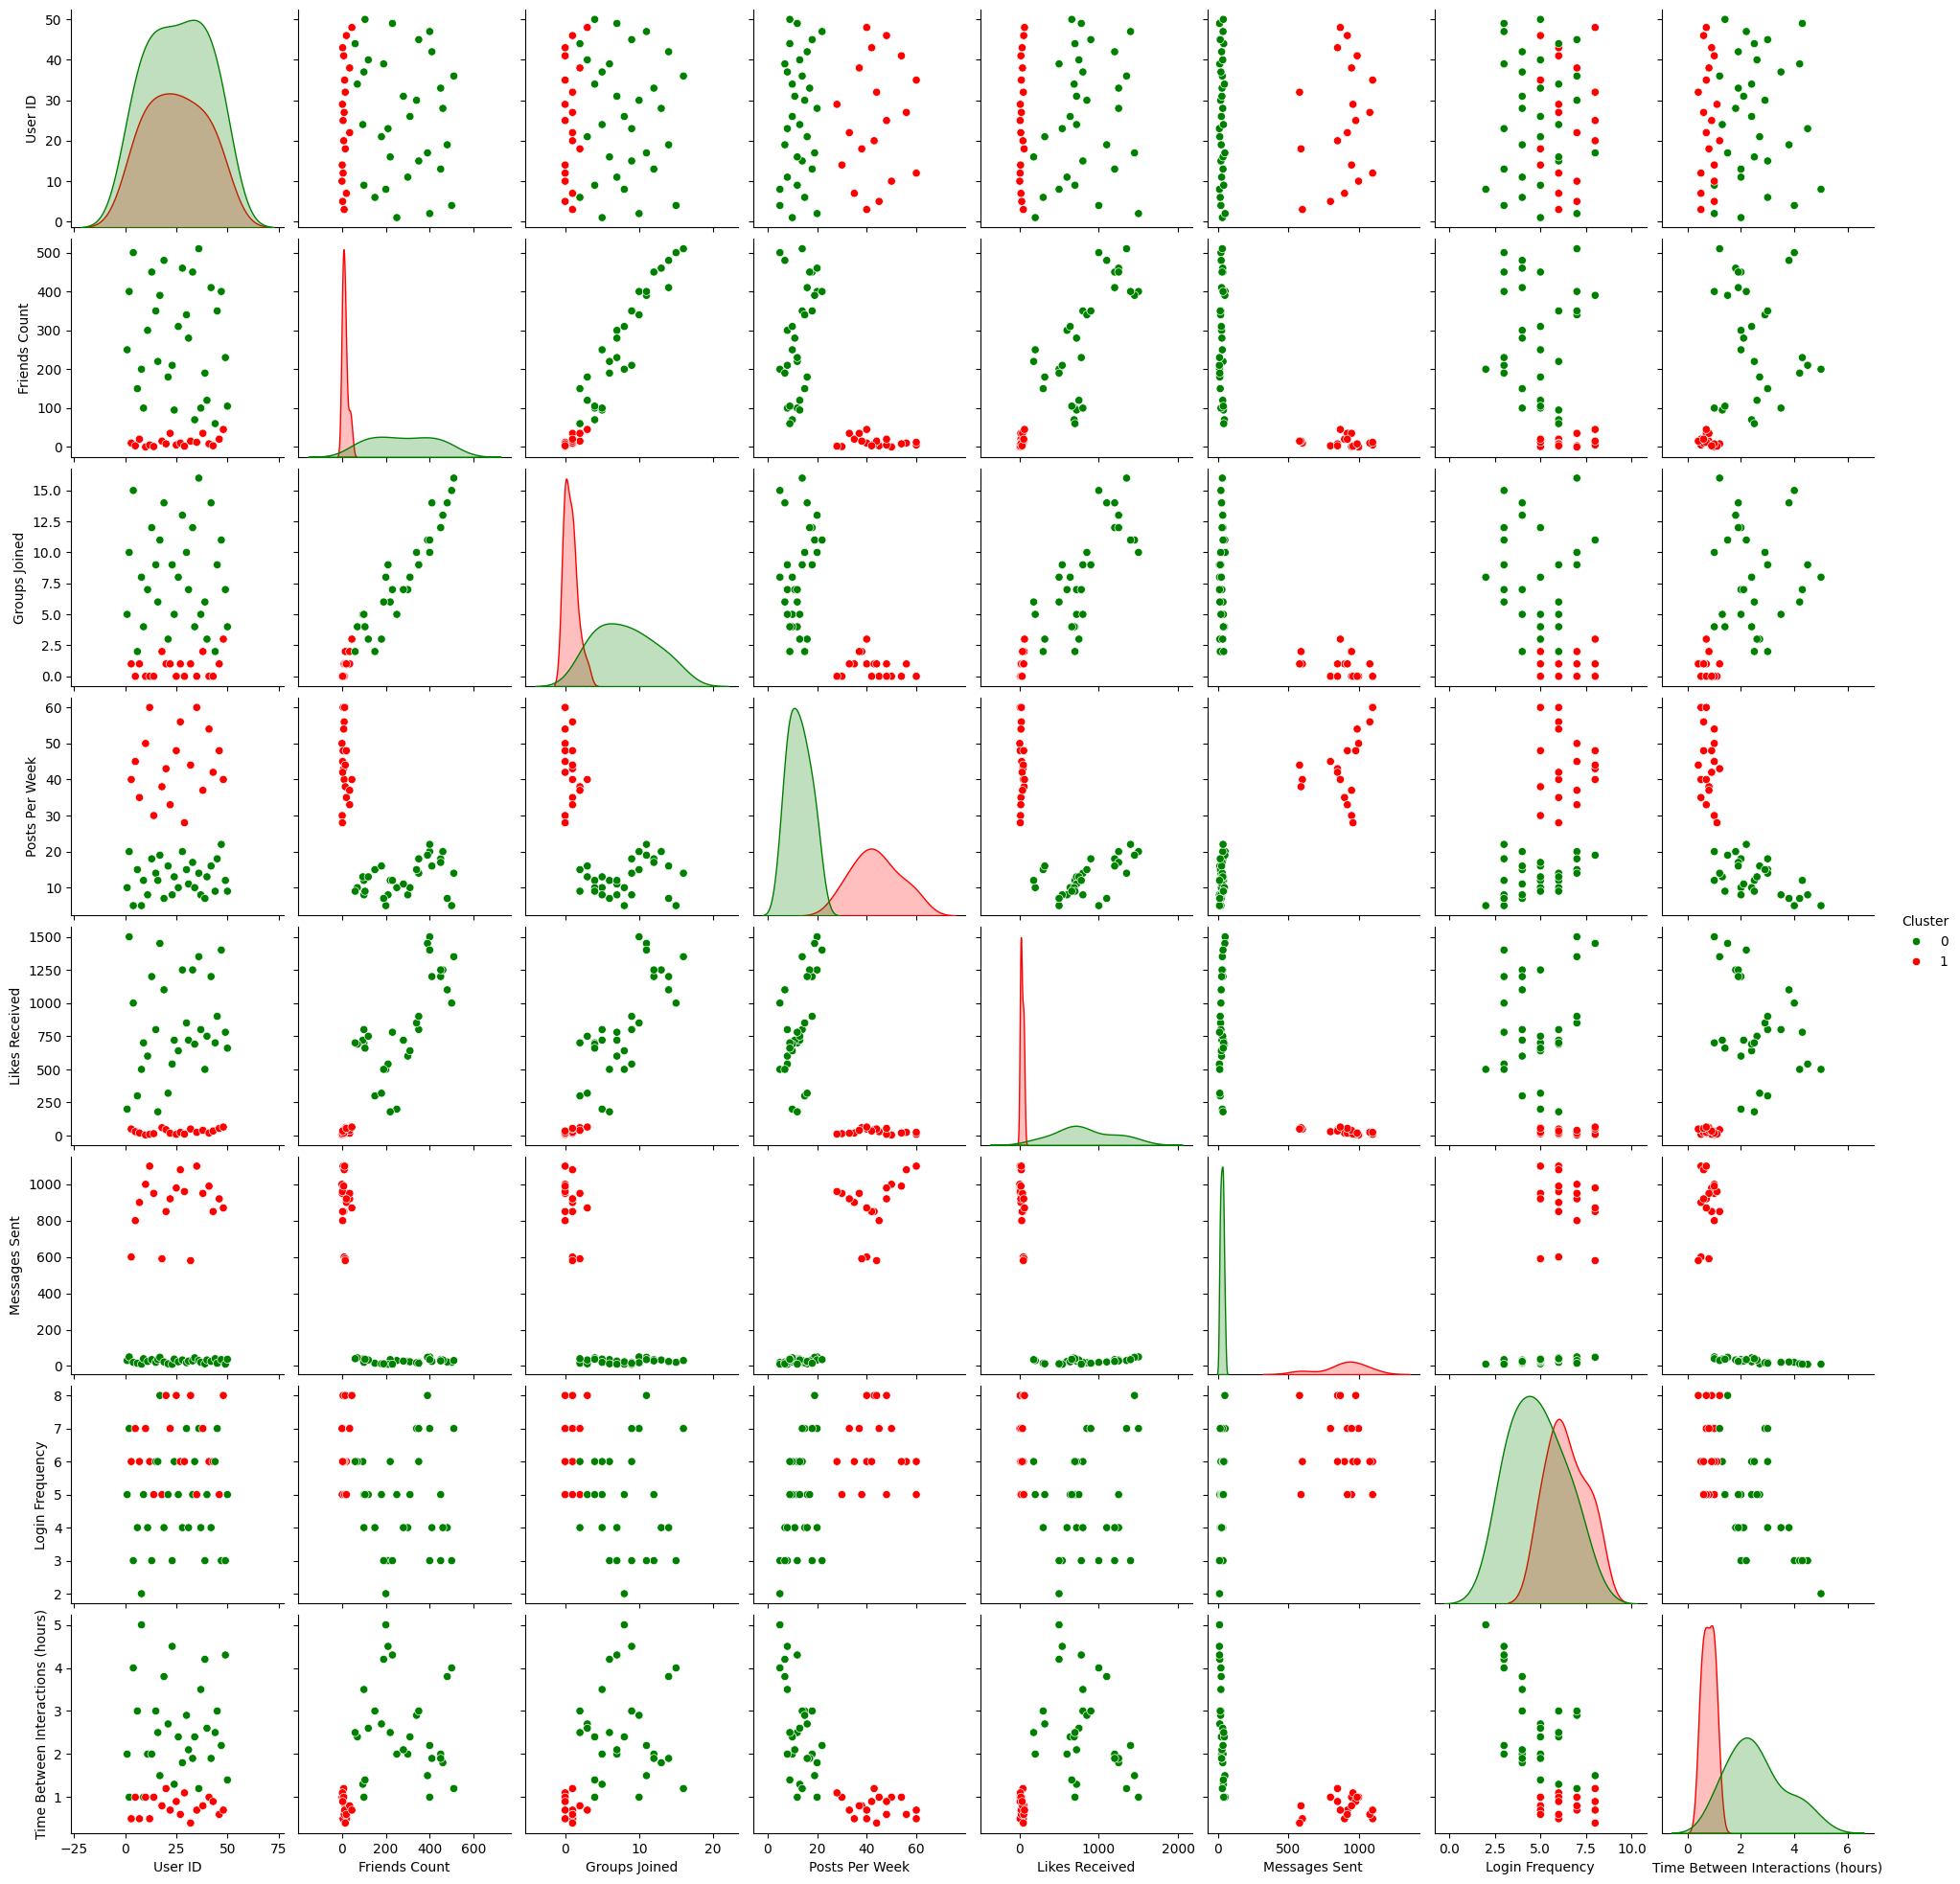

In [150]:
sns.pairplot(df, hue='Cluster', palette=['green', 'red'], diag_kind='kde')
plt.show()


In [151]:
# Save the data with cluster labels
df.to_csv('clusters.csv', index=False)

# Download the file
from google.colab import files
files.download('clusters.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>